In [1]:
import pandas as pd
import numpy as np
import os
import requests
import math
import env
import wrangle as w
import explore as exp
import datetime
from scipy.stats import chi2_contingency
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2

In [2]:
# Example usage:
app_token = env.app_token
year_to_retrieve = '2022'
max_req = 2000  # Specify the maximum number of observations to retrieve


In [3]:
df = w.wrangle_coll_stage1(year_to_retrieve, app_token)

CSV file for 2022 already exists. Loading data from the CSV.


In [4]:
# df.to_csv('preprocessed_df.csv', index=False)

In [5]:
df.describe(include='all')

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,on_street_name,borough,zip_code,injuries_count,deaths_count,injuries,deaths,vehicle_1_category,vehicle_2_category,factors_category_vehicle_1,factors_category_vehicle_2,factors_subcat_vehicle_1,factors_subcat_vehicle_2
count,48254,48254,48254,4.825400e+04,48254.000000,48254.000000,48254,48253,48254.000000,48254.000000,48254.000000,48254,48254,48253,48253,48254,48254,48254,48254
unique,NaN,NaN,1440,NaN,NaN,NaN,4518,5,NaN,NaN,NaN,2,2,9,9,2,2,6,6
top,NaN,NaN,00:00:00,NaN,NaN,NaN,belt parkway,brooklyn,NaN,NaN,NaN,False,False,personal vehicles,personal vehicles,driver_related,non_driver_related,driving violations,environmental
freq,NaN,NaN,737,NaN,NaN,NaN,787,15852,NaN,NaN,NaN,32376,48198,42130,37591,34543,42301,17900,41678
mean,2022-07-04 07:56:23.031872768,2022-07-03 18:46:25.161851904,NaN,4.544011e+06,40.725196,-73.917005,NaN,NaN,10878.007233,0.470137,0.001202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022-01-01 00:15:00,2022-01-01 00:00:00,NaN,4.491064e+06,40.500896,-74.254960,NaN,NaN,7024.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-04-07 13:52:15,2022-04-07 00:00:00,NaN,4.517686e+06,40.667316,-73.964188,NaN,NaN,10453.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-07-04 11:30:00,2022-07-04 00:00:00,NaN,4.544368e+06,40.716326,-73.921402,NaN,NaN,11207.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-09-29 09:45:00,2022-09-29 00:00:00,NaN,4.569548e+06,40.784671,-73.867832,NaN,NaN,11239.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-12-31 23:50:00,2022-12-31 00:00:00,NaN,4.665848e+06,40.912167,-73.700840,NaN,NaN,11697.000000,15.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


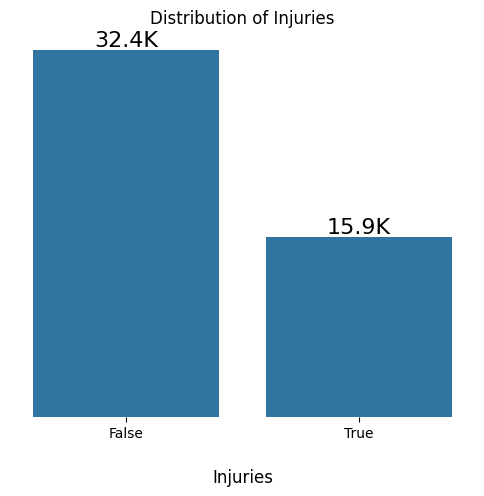

In [6]:
# Customized plot for distribution of the target variable 'injuries'
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='injuries', data=df, color="#1f77b4")

# Remove y-axis and grid
ax.set(yticklabels=[])
ax.yaxis.set_ticks_position('none')
sns.despine(left=True, bottom=True)

# Get the y-axis height
y_axis_height = ax.get_ylim()[1]  # This retrieves the maximum y-axis value

# Display count on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1000:.1f}K', (p.get_x() + p.get_width() / 2., p.get_height() + (y_axis_height * 0.01)),
                ha='center', va='baseline', fontsize=16)

# Add title and labels with customized padding and font size
plt.title('Distribution of Injuries', fontsize=12)
plt.xlabel('Injuries', labelpad=20, fontsize=12)
plt.ylabel('')

# Show the plot
plt.show()


In [7]:
# Modify the customized bar plot function to include figsize as a parameter
def customized_barplot_v4(x, y, data, title, xlabel, x_label_rotation=0, bar_font_size=12, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=data.sort_values(y, ascending=False), color="#1f77b4")
    
    ax.set(yticklabels=[])
    ax.yaxis.set_ticks_position('none')
    sns.despine(left=True, bottom=True)
    
    y_axis_height = ax.get_ylim()[1]
    
    for p in ax.patches:
        if p.get_height() < 1000:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + (y_axis_height * 0.01)),
                        ha='center', va='baseline', fontsize=bar_font_size)
        else:
            ax.annotate(f'{p.get_height()/1000:.1f}K', (p.get_x() + p.get_width() / 2., p.get_height() + (y_axis_height * 0.01)),
                        ha='center', va='baseline', fontsize=bar_font_size)
    
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, labelpad=20, fontsize=12)
    plt.ylabel('')
    plt.xticks(rotation=x_label_rotation)
    
    plt.show()

In [8]:
# Modified function to conduct Chi-Square Test and interpret results
def chi_square_test(dataframe, target_var, category_var):
    # Create a contingency table
    contingency_table = pd.crosstab(dataframe[category_var], dataframe[target_var])
    
    # Conduct the Chi-Square Test of Independence
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calculate r value (effect size measure for chi-square, known as Cramér's V)
    r_value = (chi2_stat / (len(dataframe) * (min(contingency_table.shape) - 1))) ** 0.5
    
    # Print p-value and r-value
    print(f"p-value: {p_value}")
    print(f"r-value: {r_value:.2f}")
    
    # Interpretation of p-value and r-value
    print("\nInterpretation:")
    if p_value < 0.05:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")
    
    if r_value < 0.1:
        print("The r-value suggests a small effect size.")
    elif 0.1 <= r_value < 0.3:
        print("The r-value suggests a medium effect size.")
    else:
        print("The r-value suggests a large effect size.")


In [9]:
# Adjust the 'injuries' column in the aggregated data to count each injury occurrence as 0.5
adjusted_vehicle_category_df = pd.DataFrame({'combined_vehicle_category': df['vehicle_1_category'].tolist() + df['vehicle_2_category'].tolist(),
                                             'injuries': [0.5 if x else 0 for x in df['injuries'].tolist()] * 2})

# Aggregate the adjusted data by 'combined_vehicle_category'
agg_adjusted_vehicle_category = adjusted_vehicle_category_df.groupby('combined_vehicle_category')['injuries'].sum().reset_index()


### Combined Vehicle Category
**Null Hypothesis**: The category of vehicles involved is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The category of vehicles involved is not independent of the occurrence of injuries in vehicle crashes.

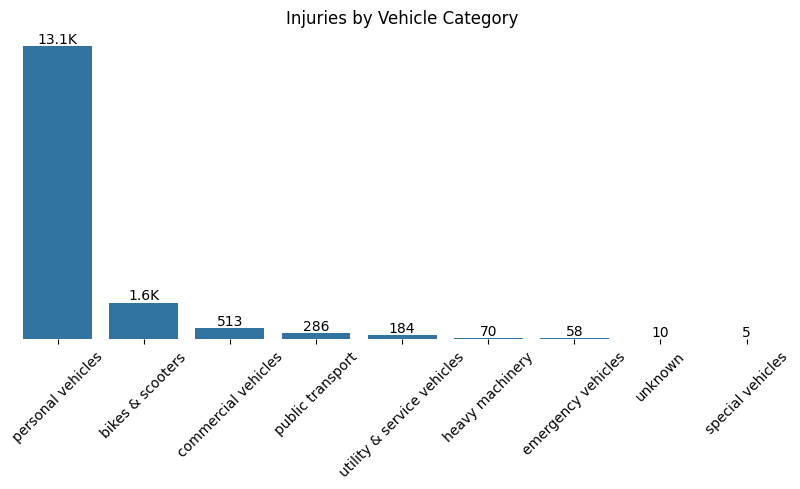

In [10]:

# Generate the modified plot for 'combined_vehicle_category' with adjusted injury counts and new formatting
customized_barplot_v4(x='combined_vehicle_category', y='injuries', data=agg_adjusted_vehicle_category, 
                      title='Injuries by Vehicle Category', xlabel='', 
                      x_label_rotation=45, bar_font_size=10, figsize=(10, 4))

In [11]:
# Test the modified function with 'vehicle_1_category' and 'injuries'
print("Chi-Square Test for 'vehicle_1_category' and 'injuries':")
chi_square_test(adjusted_vehicle_category_df, 'injuries', 'combined_vehicle_category')

Chi-Square Test for 'vehicle_1_category' and 'injuries':
p-value: 0.0
r-value: 0.18

Interpretation:
Reject the null hypothesis.
The r-value suggests a medium effect size.


In [12]:
# Adjust the 'injuries' column in the aggregated data to count each injury occurrence as 0.5
adjusted_factors_category_df = pd.DataFrame({'combined_factors_category': df['factors_category_vehicle_1'].tolist() + df['factors_category_vehicle_2'].tolist(),
                                             'injuries': [0.5 if x else 0 for x in df['injuries'].tolist()] * 2})

adjusted_factors_subcat_df = pd.DataFrame({'combined_factors_subcat': df['factors_subcat_vehicle_1'].tolist() + df['factors_subcat_vehicle_2'].tolist(),
                                           'injuries': [0.5 if x else 0 for x in df['injuries'].tolist()] * 2})

# Aggregate the adjusted data by 'combined_factors_category' and 'combined_factors_subcat'
agg_adjusted_factors_category = adjusted_factors_category_df.groupby('combined_factors_category')['injuries'].sum().reset_index()
agg_adjusted_factors_subcat = adjusted_factors_subcat_df.groupby('combined_factors_subcat')['injuries'].sum().reset_index()



### Factor Category
**Null Hypothesis**: The contributing factors category is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The contributing factors category is not independent of the occurrence of injuries in vehicle crashes.

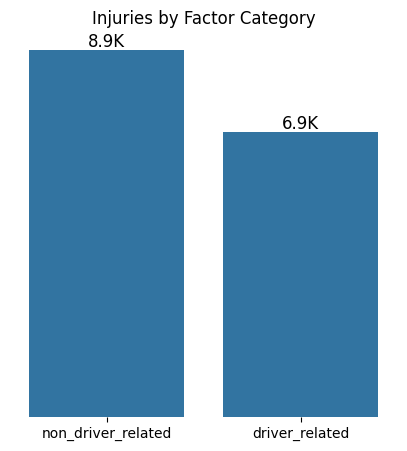

In [13]:
# Generate the plots for 'combined_factors_category' and 'combined_factors_subcat' with adjusted injury counts
customized_barplot_v4(x='combined_factors_category', y='injuries', data=agg_adjusted_factors_category, 
                   title='Injuries by Factor Category', xlabel='', 
                      x_label_rotation=0, bar_font_size=12, figsize=(5, 5))

In [14]:
# Conduct and interpret Chi-Square Test for 'combined_factors_category' and 'injuries'
print("Chi-Square Test for 'combined_factors_category' and 'injuries':")
chi_square_test(adjusted_factors_category_df, 'injuries', 'combined_factors_category')

Chi-Square Test for 'combined_factors_category' and 'injuries':
p-value: 1.0244024318203628e-14
r-value: 0.02

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Factors Subcategory
**Null Hypothesis**: The contributing factors subcategory is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The contributing factors subcategory is not independent of the occurrence of injuries in vehicle crashes.

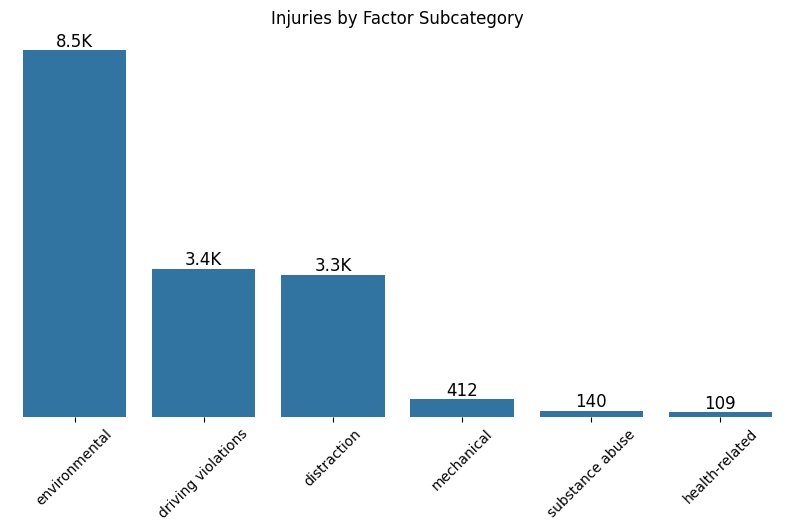

In [15]:
customized_barplot_v4(x='combined_factors_subcat', y='injuries', data=agg_adjusted_factors_subcat, 
                      title='Injuries by Factor Subcategory', xlabel='', 
                      x_label_rotation=45, bar_font_size=12, figsize=(10, 5))

In [16]:
# Conduct and interpret Chi-Square Test for 'combined_factors_subcat' and 'injuries'
print("\nChi-Square Test for 'combined_factors_subcat' and 'injuries':")
chi_square_test(adjusted_factors_subcat_df, 'injuries', 'combined_factors_subcat')



Chi-Square Test for 'combined_factors_subcat' and 'injuries':
p-value: 2.9462393746447493e-30
r-value: 0.04

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


Interpretation:
p-value: The extremely low p-values for both tests indicate that we can reject the null hypothesis, suggesting a statistically significant relationship between the combined factors and the occurrence of injuries.

r-value: The r-values for both tests are small, suggesting a small effect size. This means that while the relationship is statistically significant, it is not extremely strong.

In [17]:
# Convert 'crash_datetime' to a datetime object
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])

# Extract time-based features from 'crash_datetime'
df['hour_of_day'] = df['crash_datetime'].dt.hour
df['day_of_week'] = df['crash_datetime'].dt.day_name()
df['month'] = df['crash_datetime'].dt.month_name()

# Create a 'daylight' column, set to True if the hour is between 06 and 19, otherwise False
df['daylight'] = (df['hour_of_day'] >= 6) & (df['hour_of_day'] <= 19)

# the 'daylight_day_of_week' column to use 'Day' and 'Night' instead of True and False
df['daylight_day_of_week'] = df['day_of_week'] + '_' + df['daylight'].map({True: 'Day', False: 'Night'})

# Show the first few rows to confirm the new features
df[['crash_datetime', 'hour_of_day', 'day_of_week', 'daylight', 'daylight_day_of_week']].head()


,crash_datetime,hour_of_day,day_of_week,daylight,daylight_day_of_week
0,2022-01-01 05:17:00,5,Saturday,False,Saturday_Night
1,2022-01-01 01:30:00,1,Saturday,False,Saturday_Night
2,2022-01-01 16:40:00,16,Saturday,True,Saturday_Day
3,2022-01-01 02:53:00,2,Saturday,False,Saturday_Night
4,2022-01-01 17:00:00,17,Saturday,True,Saturday_Day


### Hour of Day
**Null Hypothesis**: The hour of the day is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The hour of the day is not independent of the occurrence of injuries in vehicle crashes.


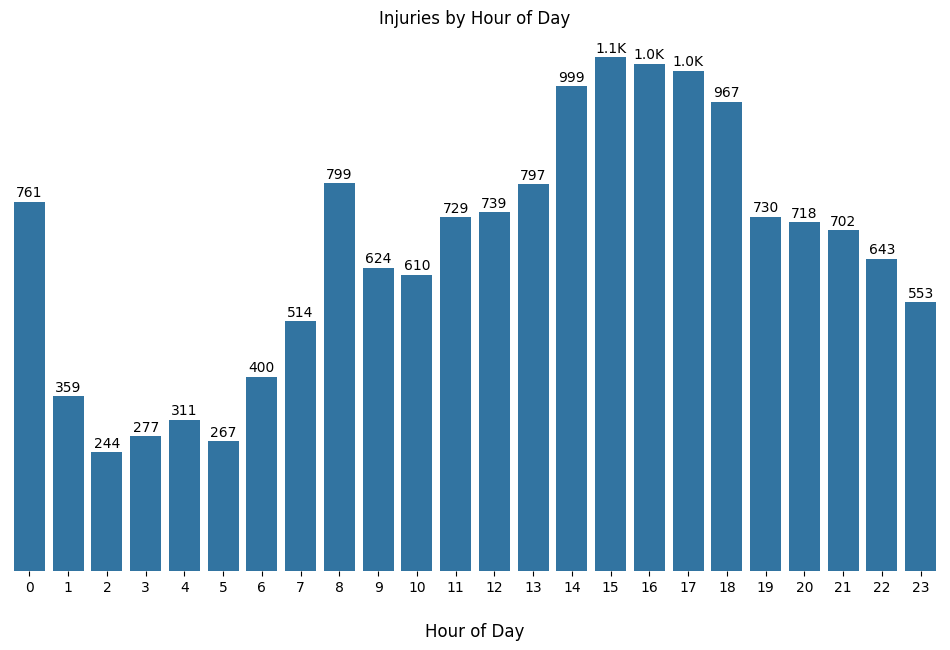

In [18]:
# Aggregate the data for the new time-based features
agg_hour_of_day = df.groupby('hour_of_day')['injuries'].sum().reset_index()
agg_day_of_week = df.groupby('day_of_week')['injuries'].sum().reset_index()
agg_daylight = df.groupby('daylight')['injuries'].sum().reset_index()
agg_daylight_day_of_week = df.groupby('daylight_day_of_week')['injuries'].sum().reset_index()

# Generate bar plots for the new features
customized_barplot_v4(x='hour_of_day', y='injuries', data=agg_hour_of_day, 
                      title='Injuries by Hour of Day', xlabel='Hour of Day', 
                      x_label_rotation=0, bar_font_size=10, figsize=(12, 7))


In [19]:

print("Chi-Square Test for 'hour_of_day':")
chi_square_test(df, 'injuries', 'hour_of_day')


Chi-Square Test for 'hour_of_day':
p-value: 3.0065722439640336e-23
r-value: 0.06

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Day of Week
**Null Hypothesis**: The day of the week is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The day of the week is not independent of the occurrence of injuries in vehicle crashes.

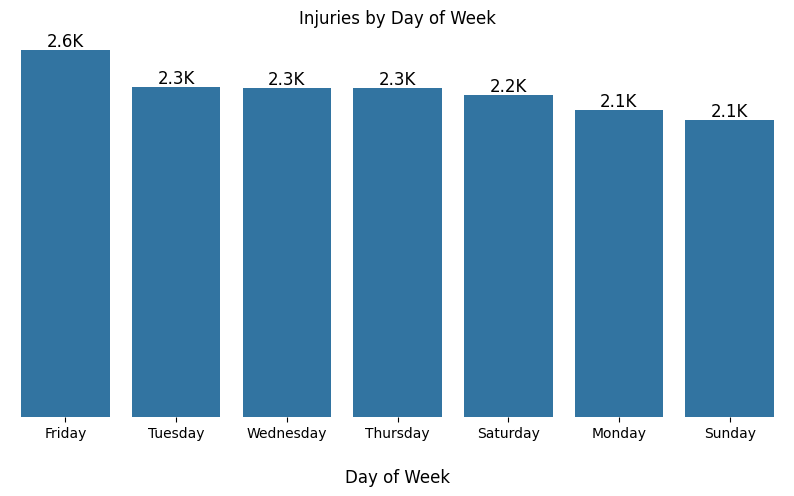

In [20]:

customized_barplot_v4(x='day_of_week', y='injuries', data=agg_day_of_week, 
                      title='Injuries by Day of Week', xlabel='Day of Week', 
                      x_label_rotation=0, bar_font_size=12, figsize=(10, 5))


In [21]:
print("\nChi-Square Test for 'day_of_week':")
chi_square_test(df, 'injuries', 'day_of_week')



Chi-Square Test for 'day_of_week':
p-value: 0.07266814052507678
r-value: 0.02

Interpretation:
Fail to reject the null hypothesis.
The r-value suggests a small effect size.


### Daylight
**Null Hypothesis**: The presence of daylight is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The presence of daylight is not independent of the occurrence of injuries in vehicle crashes.

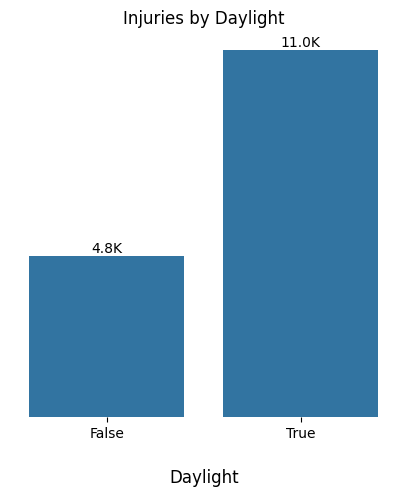

In [22]:
customized_barplot_v4(x='daylight', y='injuries', data=agg_daylight, 
                      title='Injuries by Daylight', xlabel='Daylight', 
                      x_label_rotation=0, bar_font_size=10, figsize=(5, 5))


In [23]:
print("\nChi-Square Test for 'daylight':")
chi_square_test(df, 'injuries', 'daylight')



Chi-Square Test for 'daylight':
p-value: 1.43316788659377e-06
r-value: 0.02

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Daylight & Day of Week Combined
**Null Hypothesis**: The combination of daylight and day of the week is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The combination of daylight and day of the week is not independent of the occurrence of injuries in vehicle crashes.

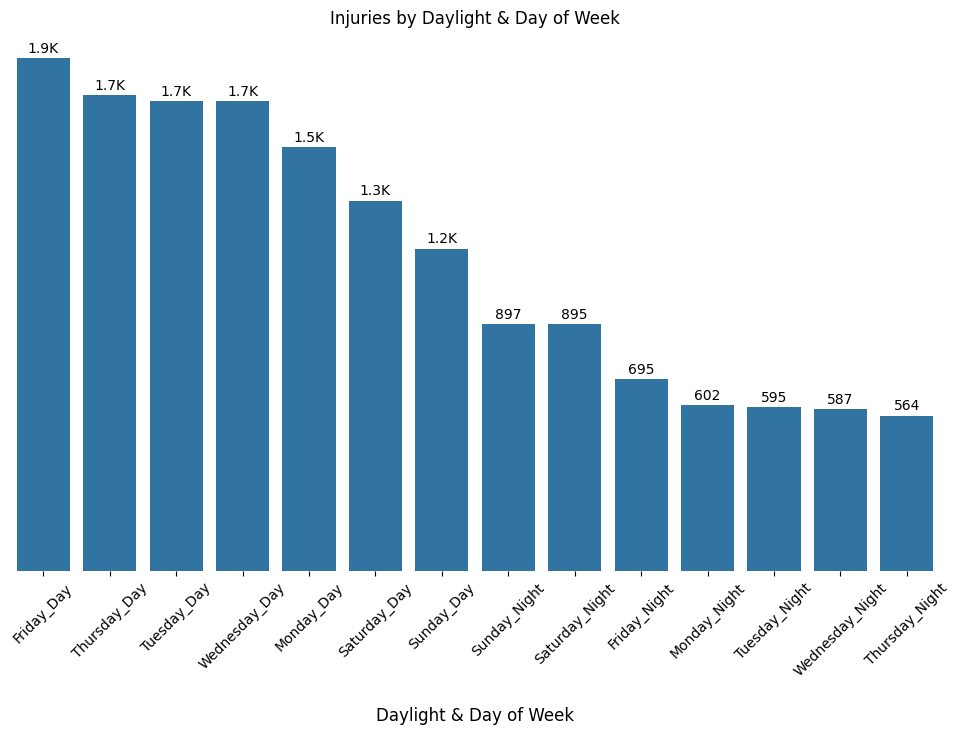

In [24]:
customized_barplot_v4(x='daylight_day_of_week', y='injuries', data=agg_daylight_day_of_week, 
                      title='Injuries by Daylight & Day of Week', xlabel='Daylight & Day of Week', 
                      x_label_rotation=45, bar_font_size=10, figsize=(12, 7))


In [25]:
print("\nChi-Square Test for 'daylight_day_of_week':")
chi_square_test(df, 'injuries', 'daylight_day_of_week')



Chi-Square Test for 'daylight_day_of_week':
p-value: 2.1339268396194903e-08
r-value: 0.04

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Borough
**Null Hypothesis**: The borough in which the crash occurs is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The borough in which the crash occurs is not independent of the occurrence of injuries in vehicle crashes.


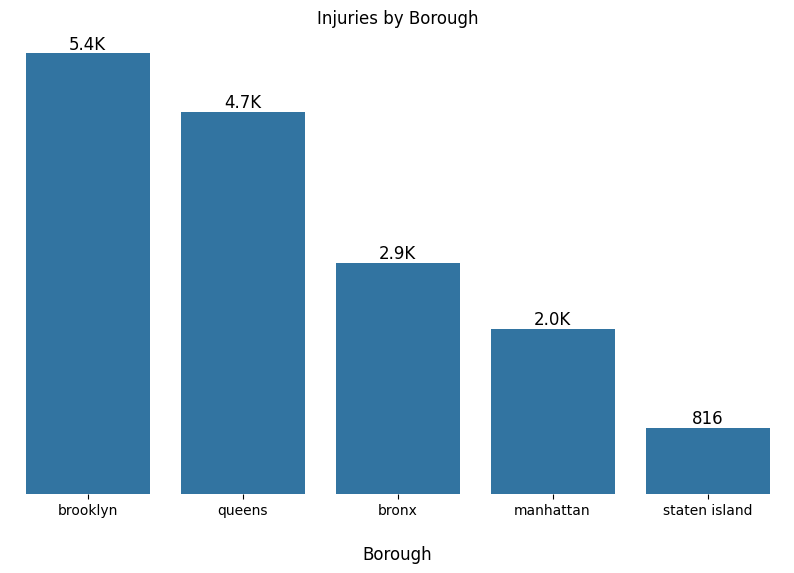

In [26]:
# Aggregate the data for the new location-based features
agg_borough = df.groupby('borough')['injuries'].sum().reset_index()

# Generate bar plots for the new location-based features
customized_barplot_v4(x='borough', y='injuries', data=agg_borough, 
                      title='Injuries by Borough', xlabel='Borough')

In [27]:
# Conduct Chi-Square Tests for the new location-based features
print("Chi-Square Test for 'borough':")
chi_square_test(df, 'injuries', 'borough')


Chi-Square Test for 'borough':
p-value: 3.492703421519629e-67
r-value: 0.08

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### ZIP Code
**Null Hypothesis**: The ZIP code in which the crash occurs is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The ZIP code in which the crash occurs is not independent of the occurrence of injuries in vehicle crashes.


In [28]:
import json
import geopandas as gpd
import folium

# Aggregate data by ZIP code, calculating the mean latitude and longitude and summing the injuries
# agg_zip_geo = df.groupby('zip_code').agg({
#     'latitude': 'mean',
#     'longitude': 'mean',
#     'injuries': 'sum'
# }).reset_index()

agg_zip_geo = df.groupby('zip_code')['injuries'].sum().reset_index()

geo_df = gpd.read_file('new-york-zip-codes-_1604.geojson')
    
# Convert ZCTA5CE10 to integer for merging
geo_df['ZCTA5CE10'] = geo_df['ZCTA5CE10'].astype(int)

# Merge the GeoDataFrame with the original DataFrame on ZIP code
merged_df = geo_df.merge(agg_zip_geo, left_on="ZCTA5CE10", right_on="zip_code")

# Create a Folium map centered around NYC
m_zip_geo = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add the GeoJSON layer to the map
folium.Choropleth(
    geo_data=merged_df,
    name='choropleth',
    data=merged_df,
    columns=['ZCTA5CE10', 'injuries'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Injury Counts'
).add_to(m_zip_geo)

# Save the map to a file
#map_file_path = "m_zip_geo"
# m_zip_geo.save(map_file_path)
m_zip_geo
#map_file_path

# https://cartographyvectors.com/map/1604-new-york-zip-codes

In [29]:
# Conduct Chi-Square Test for 'zip_code'
print("Chi-Square Test for 'zip_code':")
chi_square_test(df, 'injuries', 'zip_code')


Chi-Square Test for 'zip_code':
p-value: 1.7433991398140988e-95
r-value: 0.14

Interpretation:
Reject the null hypothesis.
The r-value suggests a medium effect size.


In [32]:
from sklearn.cluster import DBSCAN
import folium
from matplotlib import cm
import matplotlib

# Prepare the data
injury_data = df[df['injuries']][['latitude', 'longitude']].values

# Update the DBSCAN model parameters for urban high-density scenario
# Switch metric to 'manhattan' and adjust eps and min_samples accordingly
dbscan = DBSCAN(eps=0.002, min_samples=15, metric='manhattan')

# Assuming 'injury_data' contains the latitude and longitude
dbscan_labels = dbscan.fit_predict(injury_data)

cluster_df = df[df['injuries']][['latitude', 'longitude']].copy()

# Update the DataFrame to hold the new cluster labels
cluster_df['cluster'] = dbscan_labels

# # Create a basic map centered around New York City
# m_cluster_points_manhattan = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# # Use the new syntax for getting the colormap
# cmap = matplotlib.colormaps.get_cmap('tab10')

# # Calculate the number of clusters (ignoring noise, which is labeled as -1)
# n_clusters = cluster_df['cluster'].max() + 1

# # Generate distinct colors
# colors = [cmap(i / n_clusters) for i in range(n_clusters)]

# # Now you can map these colors to your clusters in Folium
# for idx, row in cluster_df.iterrows():
#     if row['cluster'] == -1:
#         color = 'gray'
#     else:
#         # Extract the RGB values
#         rgb = colors[int(row['cluster'])][:3]
#         # Convert RGB to HEX
#         color = '#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))
        
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=2,
#         color=color,
#         fill=True,
#         fill_opacity=0.6
#     ).add_to(m_cluster_points_manhattan)

# # Display the map with individual data points
# m_cluster_points_manhattan


In [35]:

import plotly.express as px
import plotly.graph_objects as go
import env
mapbox_access_token = env.mapbox_token

# Count the number of injuries in each cluster
cluster_injury_count = cluster_df[cluster_df['cluster'] != -1].groupby('cluster').size().reset_index(name='injury_count')

cluster_df_no_noise = cluster_df[cluster_df['cluster'] != -1]

# Merge this count back into the cluster DataFrame
cluster_df_no_noise = pd.merge(cluster_df_no_noise, cluster_injury_count, on='cluster', how='left')

# Create the scatter plot using Plotly Express, using 'injury_count' for the color
fig = px.scatter_mapbox(cluster_df_no_noise, lat="latitude", lon="longitude", color="injury_count",
                        color_continuous_scale="BlueRed", size_max=15, zoom=10)

# Convert the Plotly Express figure to a Plotly Graph_objects figure
fig = go.Figure(fig)

# Update the size of the markers for the cluster trace
fig.data[0].marker.size = [10]*len(cluster_df_no_noise)  # sets the size of all markers to 10

# Create a scatter plot for noise
noise_trace = go.Scattermapbox(
    lat=cluster_df[cluster_df['cluster'] == -1]['latitude'],
    lon=cluster_df[cluster_df['cluster'] == -1]['longitude'],
    mode='markers',
    marker=dict(size=10, color='green'),  # set color to gray
    name='Noise',
    visible=False  # initially hidden
)

# Add the noise trace
fig.add_trace(noise_trace)

# Update the layout to include a button to toggle the noise trace
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            x=1.2,
            y=1.0,  # Position for the first button
            buttons=[
                dict(label='Show Noise',
                     method='update',
                     args=[{'visible': [True, True]}])
            ]
        ),
        dict(
            type='buttons',
            x=1.2,
            y=0.92,  # Position for the second button
            buttons=[
                dict(label='Hide Noise',
                     method='update',
                     args=[{'visible': [True, False]}])
            ]
        )
    ],
    mapbox=dict(
        style="streets", 
        accesstoken=mapbox_access_token
    )
)

# Show the figure
# fig.show()
fig.write_html("figure2.html")


In [33]:
df.head()

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,on_street_name,borough,zip_code,injuries_count,...,vehicle_2_category,factors_category_vehicle_1,factors_category_vehicle_2,factors_subcat_vehicle_1,factors_subcat_vehicle_2,hour_of_day,day_of_week,month,daylight,daylight_day_of_week
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.84866,grand central pkwy,queens,11368,1,...,personal vehicles,driver_related,driver_related,driving violations,driving violations,5,Saturday,January,False,Saturday_Night
1,2022-01-01 01:30:00,2022-01-01,01:30:00,4491344,40.819157,-73.96038,henry hudson parkway,manhattan,10027,0,...,personal vehicles,non_driver_related,non_driver_related,environmental,environmental,1,Saturday,January,False,Saturday_Night
2,2022-01-01 16:40:00,2022-01-01,16:40:00,4491478,40.806107,-73.91799,saint ann's avenue,bronx,10454,0,...,personal vehicles,non_driver_related,non_driver_related,environmental,environmental,16,Saturday,January,True,Saturday_Day
3,2022-01-01 02:53:00,2022-01-01,02:53:00,4491586,40.646034,-73.99678,40th street,brooklyn,11232,0,...,personal vehicles,non_driver_related,non_driver_related,environmental,environmental,2,Saturday,January,False,Saturday_Night
4,2022-01-01 17:00:00,2022-01-01,17:00:00,4491660,40.701195,-73.91409,wyckoff avenue,brooklyn,11237,0,...,personal vehicles,driver_related,non_driver_related,driving violations,environmental,17,Saturday,January,True,Saturday_Day


In [62]:
df.shape

(48254, 24)